## Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [584]:
# Importing important libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [585]:
# Reading the data

sales = pd.read_csv('train.csv')
sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [586]:
# Checking dimensions of dataset

sales.shape

(8523, 12)

In [587]:
# Checking column wise dtypes

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [588]:
# Checking numerical attributes of dataset

sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [589]:
# Checking missing values

sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [590]:
# Checking percentage missing values from dataset

100*(sales.isnull().sum()/len(sales))

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

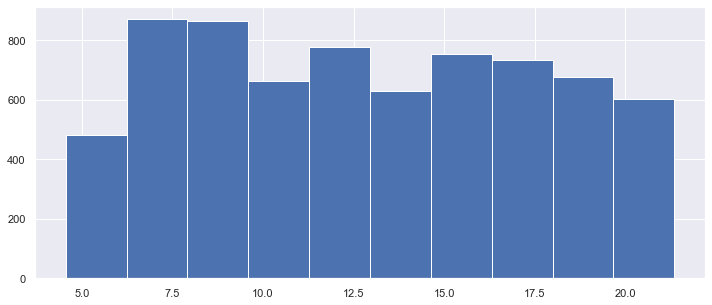

In [591]:
# Imputing missing values of column 'Item_Weight'

plt.figure(figsize= (12,5))
plt.hist(sales['Item_Weight'])
plt.show()

In [592]:
sales['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [593]:
# Imputing missing values with column median values

sales['Item_Weight'] = sales['Item_Weight'].replace(np.nan, sales['Item_Weight'].median())

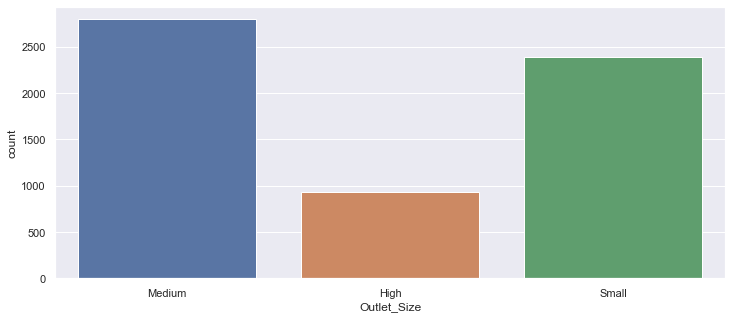

In [594]:
# Imputing missing values of column 'Outlet_Size'
plt.figure(figsize= (12,5))
sns.countplot(sales['Outlet_Size'])
plt.show()

In [595]:
# Imputing missing values with column median values

sales['Outlet_Size'] = sales['Outlet_Size'].replace(np.nan, sales['Outlet_Size'].mode()[0])

In [596]:
# Checking missing values again

sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [597]:
sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [598]:
sales.insert(2,'Outlet_age', (2013 - sales['Outlet_Establishment_Year']),allow_duplicates = True)

In [599]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace(['low fat','LF'], 'Low Fat')
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace('reg', 'Regular')


In [600]:
sales = sales.drop(['Item_Identifier','Outlet_Establishment_Year'] , axis =1)

In [601]:
sales.head()

,Item_Weight,Outlet_age,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,14,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,4,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,14,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,15,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.93,26,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


### EDA - Univariate analysis

In [602]:
f_num = sales.select_dtypes(exclude = 'object')
f = f_num.columns[:-1]

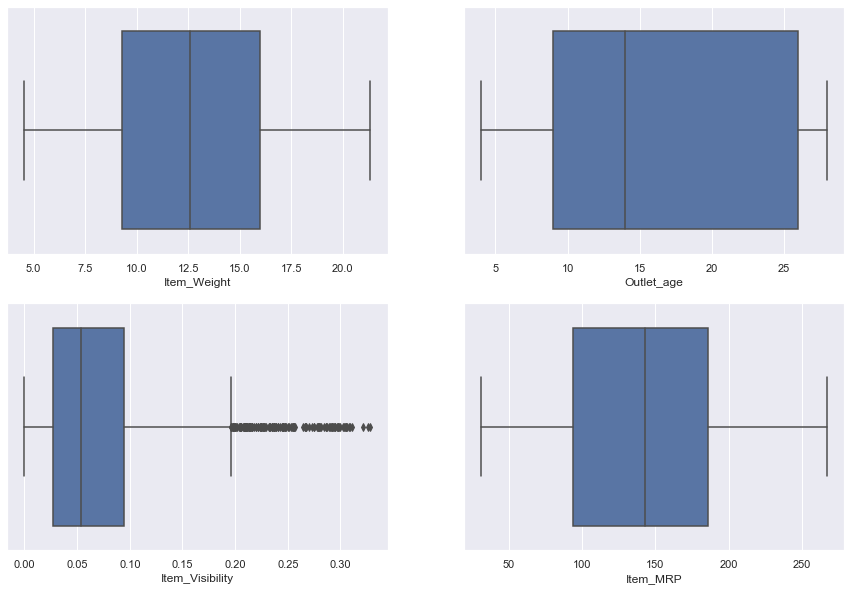

In [603]:
plt.figure(figsize=(15,10))
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(sales[i[1]])

In [604]:
f_cat = sales.select_dtypes(include = 'object')
f_1 = f_cat.columns[:-1]
f_1

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type'],
      dtype='object')

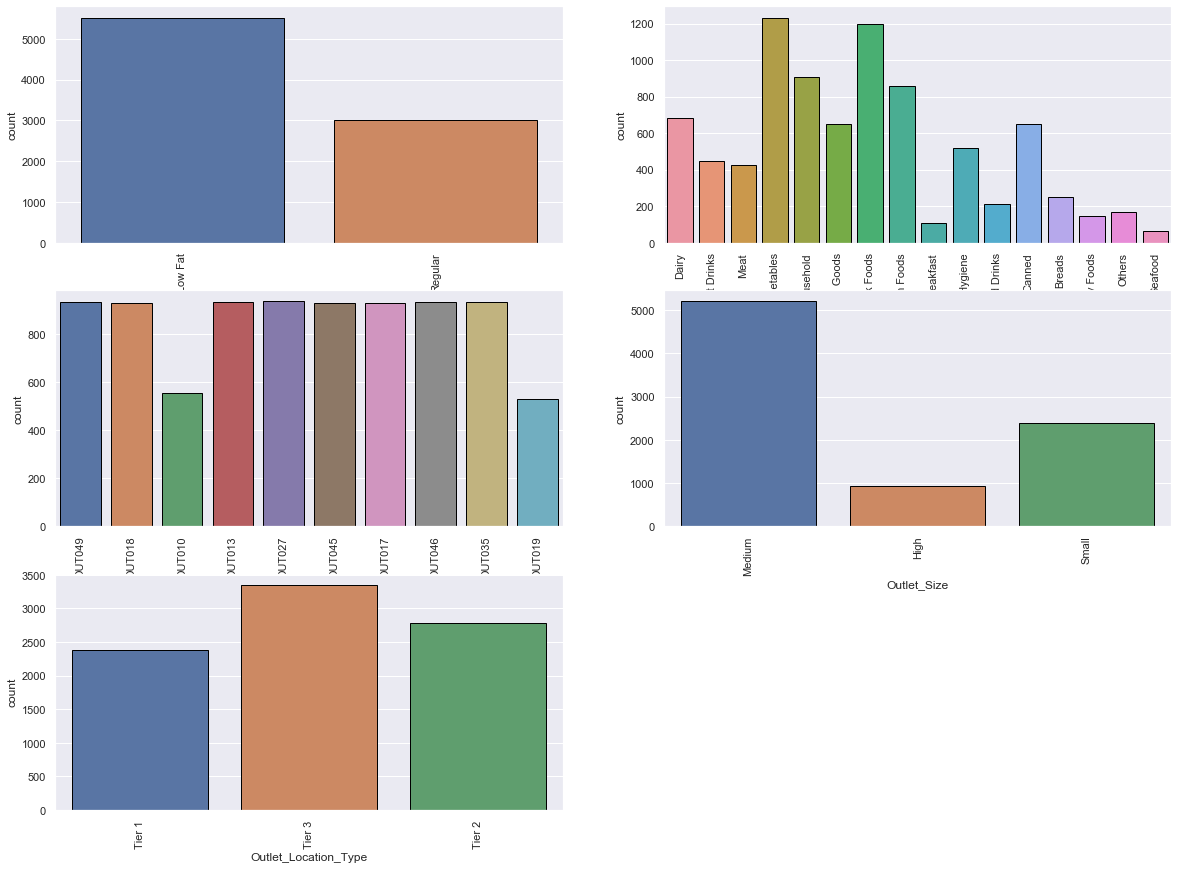

In [605]:
plt.figure(figsize=(20,20))
for i in enumerate(f_1):
    plt.subplot(4,2,i[0]+1)
    sns.countplot(x = sales[i[1]], edgecolor = 'black')
    plt.xticks(rotation = 90)

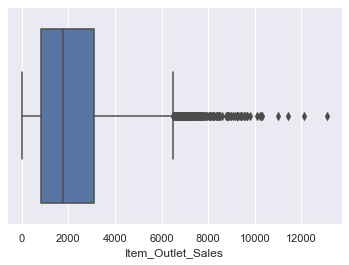

In [606]:
# Checking Target variable 'Item_Outlet_Sales'

sns.boxplot(sales['Item_Outlet_Sales'])

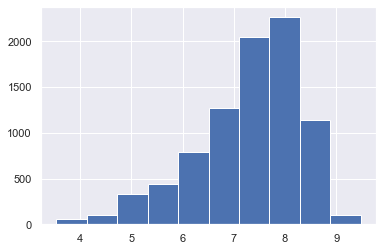

In [607]:
sales['Item_Outlet_Sales'] = np.log1p(sales['Item_Outlet_Sales'])
plt.hist(data=sales, x="Item_Outlet_Sales")
plt.show()

### EDA - Bivariate with target column 'Item_Outlet_Sales'

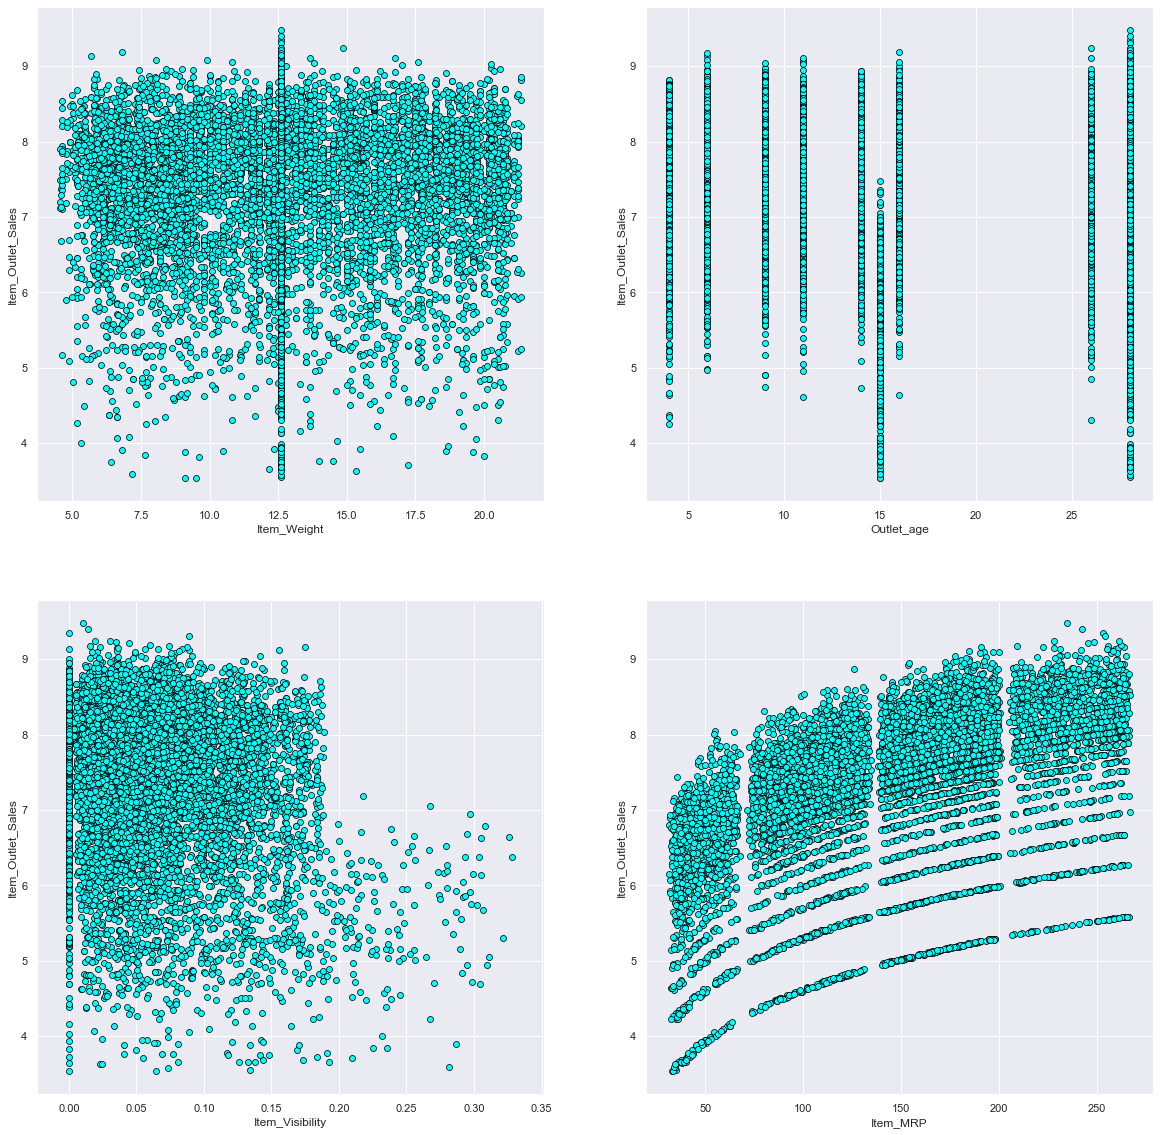

In [608]:
plt.figure(figsize = (20, 20))
f = f_num.columns[:-1]
for i in enumerate(f):
    plt.subplot(2,2,i[0] + 1)
    sns.scatterplot(x = sales[i[1]],y = sales['Item_Outlet_Sales'], color='cyan', edgecolor = 'black')

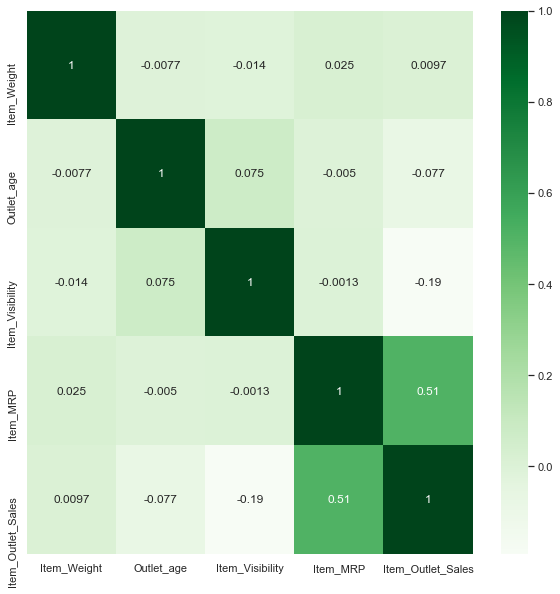

In [609]:
plt.figure(figsize = (10,10))
sns.heatmap(sales.corr(), cmap = 'Greens', annot = True)
plt.show()

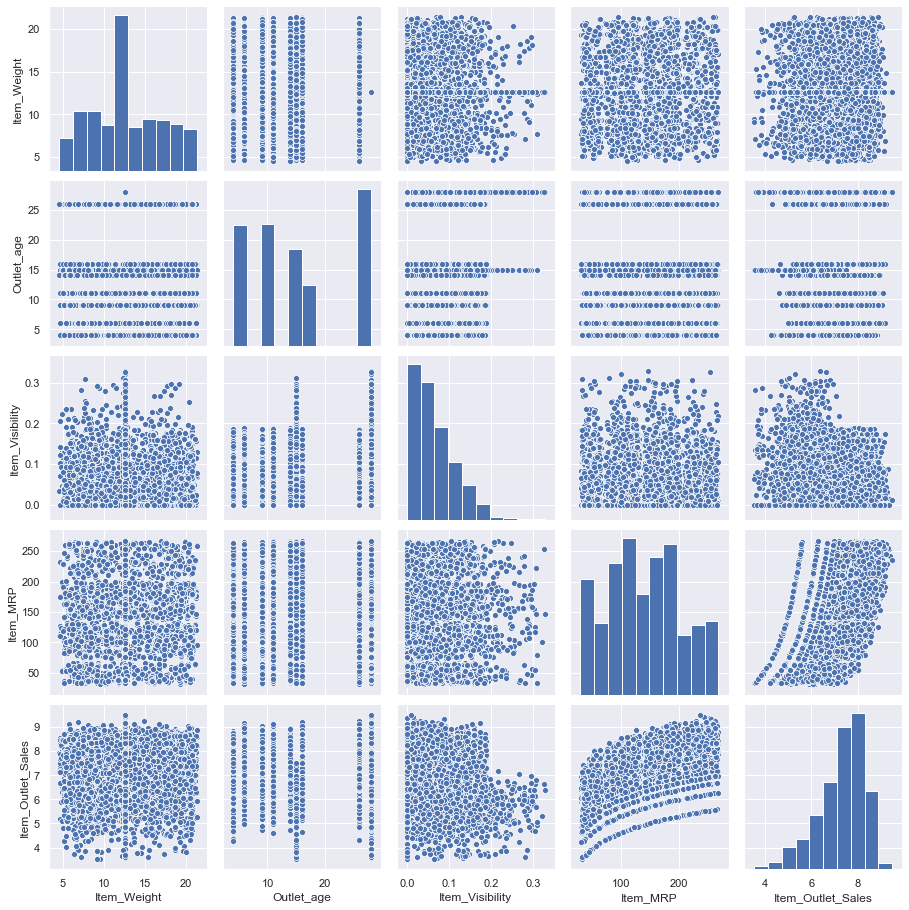

In [610]:
sns.pairplot(sales)
plt.show()

### Data Preparation

In [611]:
f_cate = sales.select_dtypes(include = 'object')
f_cate.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [612]:
# Using onehotencoding 

# Column 'Item_Fat_Content'

Fat_content = pd.get_dummies(sales['Item_Fat_Content'], prefix = 'Item_Fat_Content', drop_first = True)

sales = pd.concat([sales, Fat_content], axis = 1)

# Column 'Item_Type'

item_type = pd.get_dummies(sales['Item_Type'], prefix = 'Item_Type', drop_first = True)

sales = pd.concat([sales, item_type], axis = 1)

# Column 'Outlet_Identifier' 

Outlet_Identifier = pd.get_dummies(sales['Outlet_Identifier'], prefix = 'Outlet_Identifier', drop_first = True)

sales = pd.concat([sales, Outlet_Identifier], axis = 1)

# Column 'Outlet_Size'

sales['Outlet_Size'] = sales['Outlet_Size'].map({'Small' : 0, 'Medium' : 1, 'High' : 2})

# Columns 'Outlet_Location_Type'

sales['Outlet_Location_Type'] = sales['Outlet_Location_Type'].map({'Tier 1' : 0, 'Tier 2' : 1 , 'Tier 3' : 2})

# Columns 'Outlet_Type'

Outlet_Type = pd.get_dummies(sales['Outlet_Type'], prefix = 'Outlet_Type', drop_first = True)

sales = pd.concat([sales, Outlet_Type], axis = 1)

In [613]:
sales.head()

,Item_Weight,Outlet_age,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,14,Low Fat,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,8.225808,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,5.92,4,Regular,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,6.096776,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,17.50,14,Low Fat,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,7.648868,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,19.20,15,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1,2,Grocery Store,6.597664,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.93,26,Low Fat,0.000000,Household,53.8614,OUT013,2,2,Supermarket Type1,6.903451,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [614]:
sales = sales.drop(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis= 1)

In [615]:
sales.head()

,Item_Weight,Outlet_age,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,14,0.016047,249.8092,1,0,8.225808,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,5.92,4,0.019278,48.2692,1,2,6.096776,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,17.50,14,0.016760,141.6180,1,0,7.648868,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,19.20,15,0.000000,182.0950,1,2,6.597664,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.93,26,0.000000,53.8614,2,2,6.903451,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [616]:
y_train = sales['Item_Outlet_Sales']
X = sales.drop('Item_Outlet_Sales', axis = 1)

In [617]:
y_train.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [618]:
X.head()

,Item_Weight,Outlet_age,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,14,0.016047,249.8092,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,5.92,4,0.019278,48.2692,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,17.50,14,0.016760,141.6180,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,19.20,15,0.000000,182.0950,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.93,26,0.000000,53.8614,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [619]:
# Scaling features

from sklearn.preprocessing import StandardScaler

In [620]:
scaler = StandardScaler()

In [621]:
scaled_col = sales[['Item_Weight','Outlet_age','Item_Visibility','Item_MRP','Item_Outlet_Sales']]

X_col = scaled_col.columns

X = scaler.fit_transform(scaled_col)

X

array([[-0.83118663, -0.13954076, -0.97073217,  1.74745381,  0.91409419],
       [-1.63080955, -1.33410274, -0.90811123, -1.48902325, -1.18315988],
       [ 1.10872696, -0.13954076, -0.95691733,  0.01004021,  0.34576615],
       ...,
       [-0.52363935, -0.73682175, -0.59978449, -0.89720755, -0.20952913],
       [-1.32562802, -1.33410274,  1.53287976, -0.60797692,  0.2199048 ],
       [ 0.46997492,  0.09937163, -0.41193591, -1.05226104, -0.64601847]])

In [622]:
X = pd.DataFrame(X, columns = X_col)
sales = sales.drop(scaled_col, axis= 1)

X_train = pd.concat([X, sales], axis = 1)

In [623]:
X_train.head()

,Item_Weight,Outlet_age,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.139541,-0.970732,1.747454,0.914094,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,-1.630810,-1.334103,-0.908111,-1.489023,-1.183160,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.108727,-0.139541,-0.956917,0.010040,0.345766,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1.510904,-0.020085,-1.281758,0.660050,-0.689748,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.918719,1.293934,-1.281758,-1.399220,-0.388525,2,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [624]:
y_train.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

### Modelling

In [625]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [626]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [627]:
rfe = RFE(lm, 15)

rfe = rfe.fit(X_train,y_train)

rfe

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [628]:
temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), 
                       columns=['Variable', 'rfe_support', 'rfe_ranking'])

temp_df = temp_df[temp_df['rfe_support'] == True]

temp_df = temp_df.reset_index(drop = True)

temp_df

,Variable,rfe_support,rfe_ranking
0,Outlet_age,True,1
1,Item_Outlet_Sales,True,1
2,Outlet_Location_Type,True,1
3,Item_Type_Dairy,True,1
4,Item_Type_Soft Drinks,True,1
5,Outlet_Identifier_OUT013,True,1
6,Outlet_Identifier_OUT018,True,1
7,Outlet_Identifier_OUT019,True,1
8,Outlet_Identifier_OUT027,True,1
9,Outlet_Identifier_OUT035,True,1


In [629]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]
col

Index(['Outlet_age', 'Item_Outlet_Sales', 'Outlet_Location_Type',
       'Item_Type_Dairy', 'Item_Type_Soft Drinks', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [630]:
# Lets predict y with rfe model

y_pred = rfe.predict(X_train)

y_pred

array([8.22580774, 6.09677636, 7.64886847, ..., 7.08515943, 7.52110009,
       6.64205646])

In [631]:
# Checking model performance

from sklearn.metrics import mean_squared_error

rss = np.sum(np.square(y_train - y_pred)) 
print(f'RSS : {rss}')

mse = mean_squared_error(y_train, y_pred) 
print(f'MSE : {mse}')

rmse = mse**0.5 
print(f'RMSE : {rmse}')


RSS : 8.657354004347994e-27
MSE : 1.0157636987384717e-30
RMSE : 1.0078510300329468e-15


In [632]:
from sklearn import metrics

metrics.r2_score(y_train, y_pred)

1.0

In [633]:
print(lm.intercept_)
print(lm.coef_)

7.29786332009444
[-9.13960818e-17 -1.39561379e-16  3.17965723e-16  8.11530647e-16
  1.01515186e+00 -3.52017415e-16  1.09341830e-16  2.66014538e-16
 -1.05501147e-16 -5.65482409e-17  1.12507622e-16 -2.77736759e-16
 -2.19142372e-16 -2.66740892e-16 -3.08009098e-16 -2.03161721e-16
 -4.03360798e-16 -1.55561069e-16 -2.11755952e-16 -2.14165357e-16
 -1.23016708e-16 -5.60120726e-17 -7.30464400e-18 -2.14665684e-16
  6.24695640e-17  1.22347744e-17  4.47267717e-17  1.83106119e-16
  8.50438396e-17  2.45786634e-17 -1.42748246e-16 -2.32857677e-16
 -1.28670317e-16 -2.70710692e-17  2.46288339e-16]


In [634]:
# Residual analysis

y_res = y_train - y_pred 

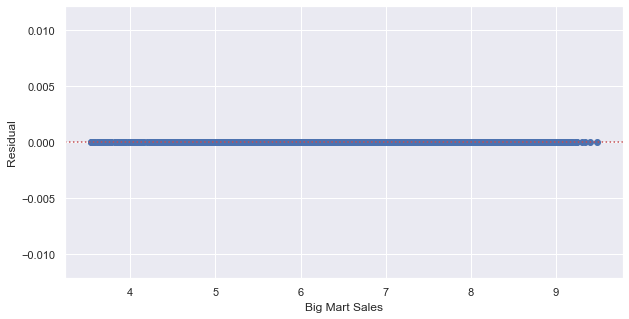

In [635]:
# Residual v/s predictions plot

plt.figure(figsize = (10,5))
plt.scatter( y_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Big Mart Sales")
plt.ylabel("Residual")
plt.show()

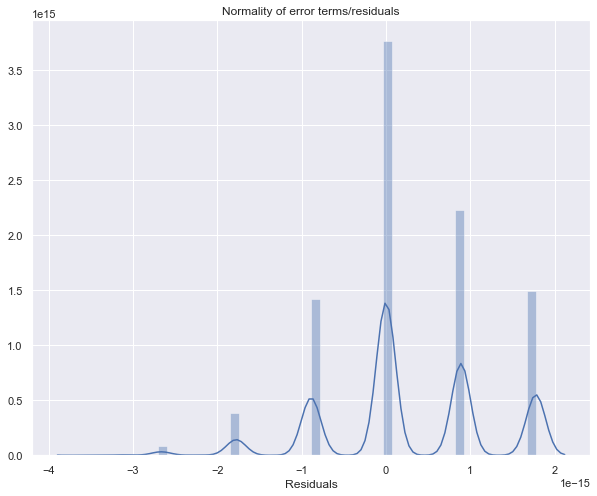

In [636]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

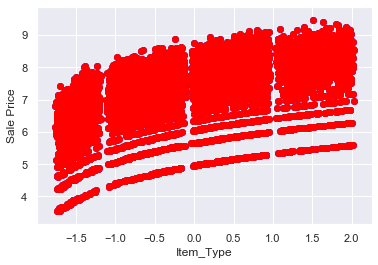

In [637]:
# Visual comparison between predicted and actual values

plt.scatter( X['Item_MRP'] , y_train , color = 'blue') # actual values
plt.scatter( X['Item_MRP'] , y_pred , color = 'red' ) # predicted values
plt.xlabel("Item_Type")
plt.ylabel("Sale Price")
plt.show()